In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: generate 900 3D array samples

In [2]:
## - 100 will have 0 mean and follow the covariance matrix [(0.5, 0, 0), (0, 0.5, 0), (0, 0, 0.01)]
## - The other 800 of them will follow the covariance matrix [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)]
##   - 100 of them will have a mean of [a, 0, 0] 
##   - 100 of them will have a mean of [a/2, a/2, 0] 
##   - 100 of them will have a mean of [0, a, 0] 
##   - 100 of them will have a mean of [-a/2, a/2, 0] 
##   - 100 of them will have a mean of [-a, 0, 0] 
##   - 100 of them will have a mean of [-a/2, -a/2, 0] 
##   - 100 of them will have a mean of [0, -a, 0] 
##   - 100 of them will have a mean of [a/2, -a/2, 0] 
## We will assume a = 6

In [3]:
def generate_samples_with_specific_mean_and_covariance(n_samples, n_features_by_sample, mean, covariance):
    """
    Generates random samples with a specified number of dimensions by sample, mean and covariance matrix.
    
    Parameters:
    - n_samples: The number of samples to generate.
    - n_features_by_sample: The number of features in each sample (length of the mean vector).
    - mean: Array or list specifying the mean for each dimension (should have n_features_by_sample elements).
    - covariance: Covariance matrix (n_features_by_sample x n_features_by_sample) to specify the desired covariance structure.
    
    Returns:
    - array: A 2D array of shape (n_samples, n_features_by_sample) with the specified mean and covariance.
    """
    
    # Step 1: Perform Cholesky decomposition on the covariance matrix
    L = np.linalg.cholesky(covariance)
    
    # Step 2: Generate a zero-mean array of standard normal random variables
    zero_mean_arrays = np.random.randn(n_samples, n_features_by_sample)
    
    # Step 3: Apply the Cholesky transformation to obtain the desired covariance
    transformed_arrays = zero_mean_arrays @ L.T
    
    # Step 4: Add the specified mean to each sample
    random_samples = transformed_arrays + mean
    
    return random_samples

In [4]:
a = 6
n_samples_by_group = 100
arrays_dim = 3

group_means = {
    'group 1': np.array([0, 0, 0]), 
    'group 2': np.array([a, 0, 0]),
    'group 3': np.array([a/2, a/2, 0]),
    'group 4': np.array([0, a, 0]),
    'group 5': np.array([-a/2, a/2, 0]),
    'group 6': np.array([-a, 0, 0]),
    'group 7': np.array([-a/2, -a/2, 0]),
    'group 8': np.array([0, -a, 0]),
    'group 9': np.array([a/2, -a/2, 0])
}

group_covariances = {
    'group 1': [(0.5, 0, 0), (0, 0.5, 0), (0, 0, 0.01)],
    'group 2': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)],
    'group 3': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)],
    'group 4': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)],
    'group 5': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)],
    'group 6': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)],
    'group 7': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)],
    'group 8': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)],
    'group 9': [(1, 0, 0), (0, 1, 0), (0, 0, 0.01)]
}

group_arrays = {
    'group 1': [],
    'group 2': [],
    'group 3': [],
    'group 4': [],
    'group 5': [],
    'group 6': [],
    'group 7': [],
    'group 8': [],
    'group 9': []
}

for group in group_arrays:
    random_samples = generate_samples_with_specific_mean_and_covariance(n_samples=n_samples_by_group, n_features_by_sample=arrays_dim, mean=group_means[group], covariance=group_covariances[group])
    group_arrays[group] = random_samples

In [5]:
# Testing
print(np.mean(group_arrays['group 1'], axis=0))
print(np.mean(group_arrays['group 2'], axis=0))
print(np.mean(group_arrays['group 3'], axis=0))

[-0.05667149 -0.08394187  0.01087022]
[6.00023640e+00 1.31077853e-01 5.86988270e-03]
[3.00808502 3.120375   0.00906618]


## Step 2: visualize the results

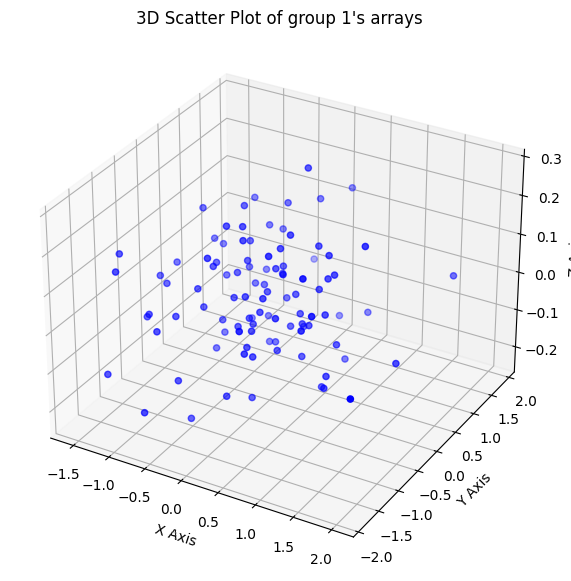

In [6]:
# Test plotting group 1's arrays

group_1_arrays = group_arrays['group 1']

# Extract the x, y, z coordinates from the arrays
x_coords = group_1_arrays[:, 0]
y_coords = group_1_arrays[:, 1]
z_coords = group_1_arrays[:, 2]

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D space
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o')

# Set labels for axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set the title
ax.set_title('3D Scatter Plot of group 1\'s arrays')

# Show the plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

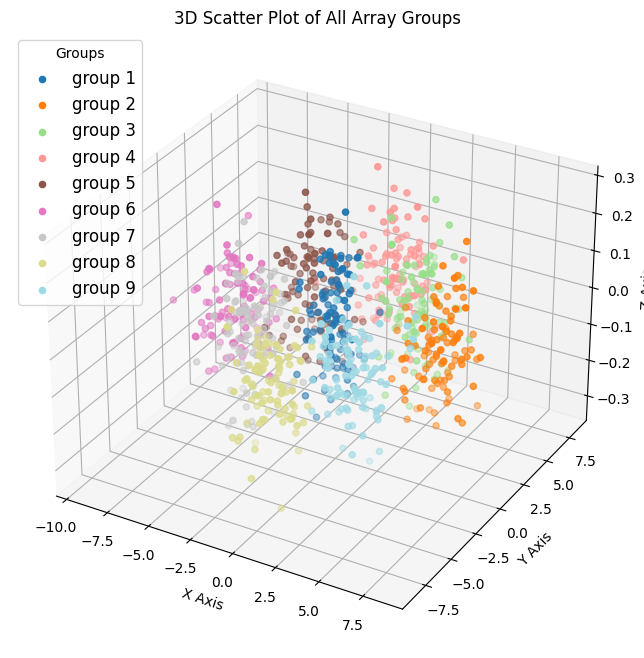

In [7]:
# Now, let's plot all array groups in the same figure

# Get random colors for each group
from matplotlib.cm import get_cmap

# Get the colormap from Matplotlib
cmap = get_cmap('tab20')  # Use 'tab20' which has 20 distinct colors
# Number of groups
num_groups = len(group_arrays)
# Generate the colors using the colormap
colors = [cmap(i) for i in np.linspace(0, 1, num_groups)]

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for idx, group in enumerate(group_arrays):
    x_coords = group_arrays[group][:, 0]
    y_coords = group_arrays[group][:, 1]
    z_coords = group_arrays[group][:, 2]

    # Plot the points in 3D space
    ax.scatter(x_coords, y_coords, z_coords, c=colors[idx % len(colors)], marker='o', label=group)

# Set labels for axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set legends
ax.legend(loc='upper left', fontsize='large', title='Groups')

# Set the title
ax.set_title('3D Scatter Plot of All Array Groups')

# Show the plot
plt.show()

## Step 3: apply LDA (Linear Discriminant Analysis) to project the features into a new feature space

Compute the within-class scatter matrix:

In [8]:
d = 3 # number of features
S_W = np.zeros((d, d))
for label, mv in group_means.items():
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for array in group_arrays[label]:
        print(array)
        array, mv = array.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (array - mv).dot((array - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

[-1.10190965 -0.96847316 -0.011088  ]
[-0.01927103  1.31858608  0.1454577 ]
[-0.26444277  0.34897153 -0.00756965]
[-0.57945874  0.5936072  -0.13663597]
[-1.14208253 -0.48185479  0.02308879]
[-0.71332782  0.21373086  0.005625  ]
[-0.20705875  0.70037261 -0.0066953 ]
[ 0.53231328 -0.15616764 -0.10554231]
[ 1.06602104 -0.8981346   0.09782037]
[ 2.02181613 -1.73877062  0.02683218]
[-0.20355256  0.36510652 -0.1573402 ]
[-0.30477954 -0.09742082  0.17986139]
[-0.43507854  0.42986463 -0.0201357 ]
[ 0.01877898 -0.07788336  0.02780619]
[ 0.72410526  1.18064296 -0.103296  ]
[-1.23187775 -0.80368751 -0.03990982]
[0.26912905 0.03789096 0.17663011]
[0.82559796 0.10846283 0.0979202 ]
[-0.61653803 -0.2684467   0.07632044]
[-0.10730338 -0.29741251 -0.0279883 ]
[-1.10101203  0.3259065   0.15113281]
[ 0.90773246  0.01898255 -0.06999743]
[-1.2742379  -1.65451954 -0.11281593]
[ 0.78146596 -0.11471918 -0.17557864]
[-0.94834518  0.54470988  0.04612285]
[-0.62086855 -0.21062812 -0.14380053]
[-0.44040193 -1.13

In [9]:
d = 3  # number of features
S_W = np.zeros((d, d))
for label, mv in group_means.items():
    class_scatter = np.cov(group_arrays[label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix: 3x3


Compute the between-class scatter matrix:

In [10]:
all_group_arrays = []
for label, group_array in group_arrays.items():
    for array in group_array:
        all_group_arrays.append(array)

In [11]:
d = 3  # number of features
S_B = np.zeros((d, d))

mean_overall = np.mean(all_group_arrays, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # make column vector

for i, mean_vec in group_means.items():
    n = group_arrays[label].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 3x3


Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [12]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [13]:
print('\nEigenvalues \n', eigen_vals)
print('\nEigenvectors \n', eigen_vecs)


Eigenvalues 
 [1.18714948e+03 1.29116234e+03 2.17970973e-02]

Eigenvectors 
 [[-9.74875136e-01 -8.72562146e-02 -2.78493400e-06]
 [-8.59449715e-02  9.89158293e-01 -3.32859821e-06]
 [ 2.05504090e-01 -1.18119535e-01  1.00000000e+00]]


#### Plot the data in a subspace generated from the non-negative eigenvectors from the matrix $S_W^{-1}S_B$ using LDA

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

1291.1623410251254
1187.1494765478644
0.021797097348642387


In [15]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.08725621 -0.97487514]
 [ 0.98915829 -0.08594497]
 [-0.11811954  0.20550409]]


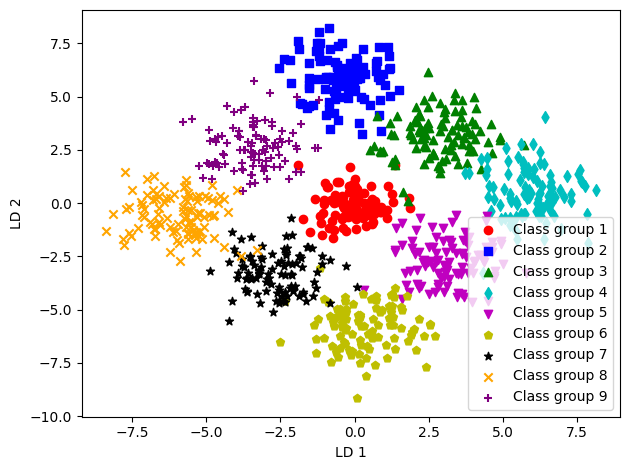

In [16]:
all_group_arrays = np.array(all_group_arrays)
labels = []
for label, group_array in group_arrays.items():
    for array in group_array: 
        labels.append(label) 
labels = np.array(labels)
X_train_lda = all_group_arrays.dot(w)

colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple']  # 9 different colors
markers = ['o', 's', '^', 'd', 'v', 'p', '*', 'x', '+']  # 9 distinct marker types

for l, c, m in zip(group_arrays.keys(), colors, markers):
    plt.scatter(X_train_lda[labels == l, 0],
                X_train_lda[labels == l, 1] * (-1),
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [17]:
# This is another way of visualizing the distribution of arrays in each label, projected in a different subspace!